In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [295]:
df = pd.read_csv(r"C:\Masterpiece By Nickopusan\Document\Amazon\amazon.csv")

In [296]:
print(f"This data have {df.shape[0]} columns, {df.shape[1]} rows, {df.duplicated().sum()} duplicate, and null : \n{df.isnull().sum()}")

This data have 1465 columns, 16 rows, 0 duplicate, and null : 
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [299]:
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

In [300]:
df = df.drop(columns=['user_id', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'])

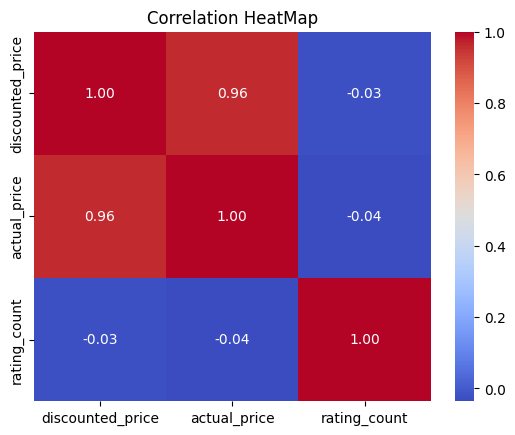

In [ ]:
df_num = df.corr(numeric_only=True)
plt.Figure(figsize=(10,8))
sns.heatmap(df_num, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation HeatMap')
plt.show()

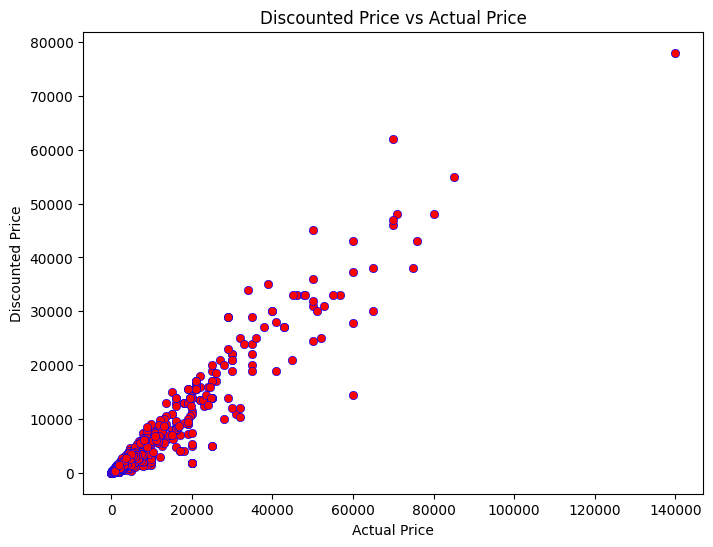

In [302]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', color='red', edgecolor='blue')
plt.title("Discounted Price vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.show()

In [303]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."


In [304]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [305]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

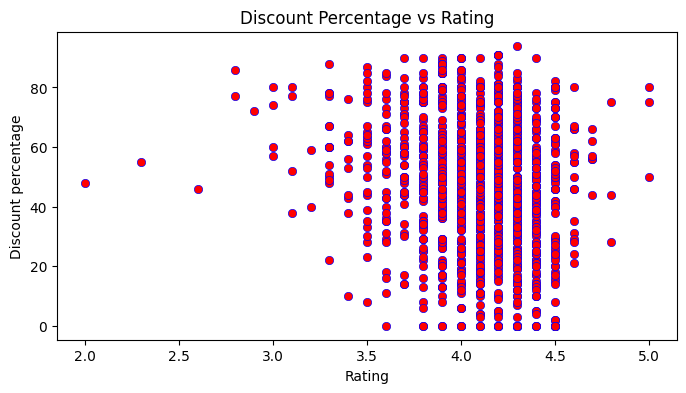

In [306]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='rating', y='discount_percentage', edgecolor='blue', color='red')
plt.title("Discount Percentage vs Rating")
plt.xlabel("Rating")
plt.ylabel("Discount percentage")
plt.show()

In [307]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."
...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome..."
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH..."
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,3.6,468.0,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz..."
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26.0,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan..."


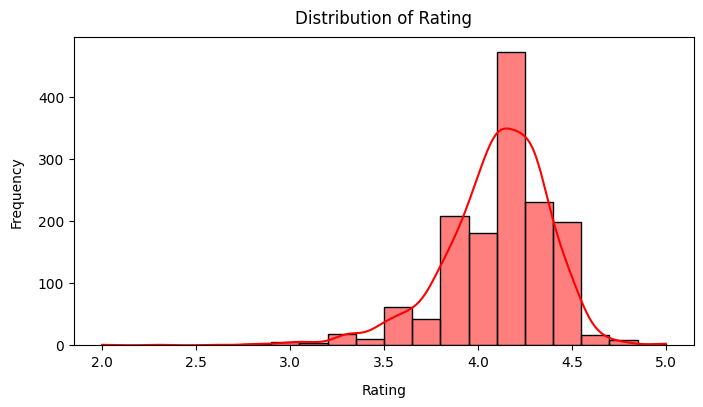

In [308]:
plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=20, fill=True, color='red', kde=True)
plt.title("Distribution of Rating", loc='center', pad=10)
plt.xlabel("Rating", loc='center', labelpad=10)
plt.ylabel("Frequency", loc='center', labelpad=10)
plt.show()